In [20]:
import spacy
import re
import numpy as np
import pandas as pd
from pprint import pprint
import warnings

from gensim import corpora
import operator
import gensim
from gensim.models import LdaModel,LsiModel,CoherenceModel

import pyLDAvis.gensim
import pyLDAvis
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore",category=DeprecationWarning)
spacy.load('en')
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

import random
def tokens(text_data,loc,enc):
    with open(loc,encoding=enc) as f:
        for line in f:
            tokens = prepare_text_for_lda(line)
            if random.random() > .99:
                text_data.append(tokens)    
text_data=[]
loc='articles'
enc="utf-8"
tokens(text_data,loc,enc)
print("DONE")


[nltk_data] Downloading package wordnet to /home/hp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/hp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
DONE


In [21]:
import matplotlib.pyplot as plt
from gensim.test.utils import datapath
from wordcloud import WordCloud, STOPWORDS 

bigram = gensim.models.Phrases(text_data, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

text_data1=text_data
data_words_bigrams = make_bigrams(text_data)
text_data=data_words_bigrams

dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data] #Vectorization
import pickle
pickle.dump(corpus, open('articlesCorpus.pkl', 'wb'))
dictionary.save('articlesDict.dict')

(0, '0.014*"party" + 0.011*"state" + 0.010*"congress" + 0.009*"minister" + 0.007*"government"')
(1, '0.011*"state" + 0.010*"family" + 0.007*"would" + 0.007*"government" + 0.006*"election"')
(2, '0.015*"party" + 0.013*"minister" + 0.011*"state" + 0.011*"chief" + 0.007*"congress"')
(3, '0.014*"state" + 0.013*"police" + 0.012*"protest" + 0.011*"government" + 0.010*"violence"')
(4, '0.018*"state" + 0.013*"government" + 0.008*"supreme_court" + 0.007*"would" + 0.007*"india"')

Perplexity:  -7.722553613977904

Coherence Score:  0.2787590230694851


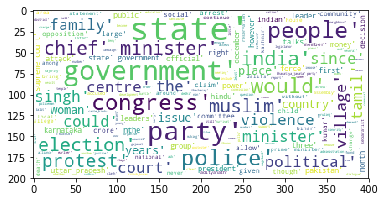

In [22]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('articles.gensim')
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

print('\nPerplexity: ', ldamodel.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=ldamodel, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


wordcloud = WordCloud(
                          background_color='white',
                          stopwords=en_stop,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(text_data))
plt.imshow(wordcloud)


pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

pyLDAvis.save_html(lda_display, 'ldaTrain.html')

(0, '0.008*"developer" + 0.008*"thing" + 0.007*"technology" + 0.007*"cultural"')
(1, '0.033*"company" + 0.013*"ability" + 0.013*"people" + 0.012*"think"')
(2, '0.001*"party" + 0.001*"minister" + 0.001*"state" + 0.001*"chief"')
(3, '0.008*"example" + 0.001*"state" + 0.001*"police" + 0.001*"protest"')
(4, '0.023*"cloud" + 0.017*"system" + 0.014*"could" + 0.012*"offer"')

Perplexity:  -10.979819651690471


/home/hp/anaconda3/lib/python3.6/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/home/hp/anaconda3/lib/python3.6/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:317: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))



Coherence Score:  nan


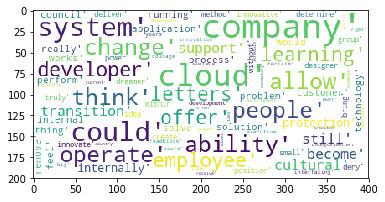

In [26]:
lda = gensim.models.ldamodel.LdaModel.load('articles.gensim')
text_data = []
loc='unseen.txt'
enc="ISO-8859-1"
tokens(text_data,loc,enc)

bigram = gensim.models.Phrases(text_data, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

text_data1=text_data
data_words_bigrams = make_bigrams(text_data)
text_data=data_words_bigrams

Newcorpus = [dictionary.doc2bow(text) for text in text_data] #Vectorization
unseen=Newcorpus[0]
vector=lda[unseen]
lda.update(Newcorpus)
topics = lda.print_topics(num_words=4)
for topic in topics:
    print(topic)

print('\nPerplexity: ', lda.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


wordcloud = WordCloud(
                          background_color='white',
                          stopwords=en_stop,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(text_data))
plt.imshow(wordcloud)


pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

pyLDAvis.save_html(lda_display, 'ldaTest.html')